## Prediction of traffic at particular time

In [68]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("traffic.csv")

In [69]:
data

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [70]:
data.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [71]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format = '%d-%m-%Y %H:%M')
data.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [72]:
data['Datetime'].dt.hour.tail()

18283    19
18284    20
18285    21
18286    22
18287    23
Name: Datetime, dtype: int64

In [73]:
data['Datetime'].dt.month.head()

0    8
1    8
2    8
3    8
4    8
Name: Datetime, dtype: int64

In [74]:
data['Datetime'].dt.month

0        8
1        8
2        8
3        8
4        8
        ..
18283    9
18284    9
18285    9
18286    9
18287    9
Name: Datetime, Length: 18288, dtype: int64

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
new_data = pd.DataFrame({'month': data['Datetime'].dt.month,
                         'year': data['Datetime'].dt.year,
                         'day': data['Datetime'].dt.dayofweek,
                         'hour': data['Datetime'].dt.hour,
                         'minute': data['Datetime'].dt.minute,
                         'year_end': data['Datetime'].dt.is_year_end,
                         'month_end': data['Datetime'].dt.is_month_end,
                         'count': data['Count']})
new_data.head(10)

,month,year,day,hour,minute,year_end,month_end,count
0,8,2012,5,0,0,False,False,8
1,8,2012,5,1,0,False,False,2
2,8,2012,5,2,0,False,False,6
3,8,2012,5,3,0,False,False,2
4,8,2012,5,4,0,False,False,2
5,8,2012,5,5,0,False,False,2
6,8,2012,5,6,0,False,False,2
7,8,2012,5,7,0,False,False,2
8,8,2012,5,8,0,False,False,6
9,8,2012,5,9,0,False,False,2


Text(0.5, 1.0, 'Month-Wise')

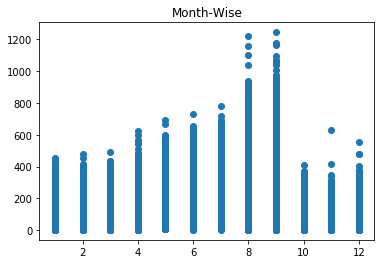

In [77]:
fig, ax = plt.subplots()

ax.scatter(new_data['month'], new_data['count'])
ax.set_title('Month-Wise')

Text(0.5, 1.0, 'Year-Wise')

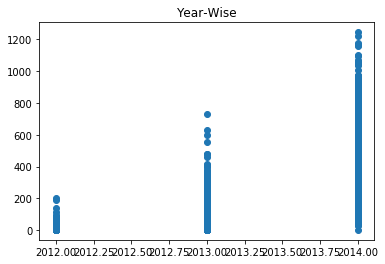

In [78]:
fig, ax = plt.subplots()

ax.scatter(new_data['year'], new_data['count'])
ax.set_title('Year-Wise')

Text(0.5, 1.0, 'Hour-wise')

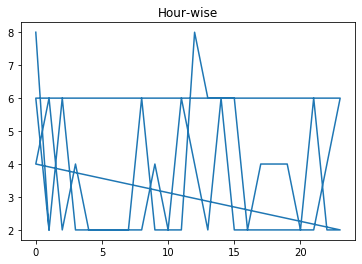

In [79]:
fig, ax = plt.subplots()

ax.plot(new_data['hour'].head(50), new_data['count'].head(50))
ax.set_title('Hour-wise')

Text(0.5, 1.0, 'Month-wise')

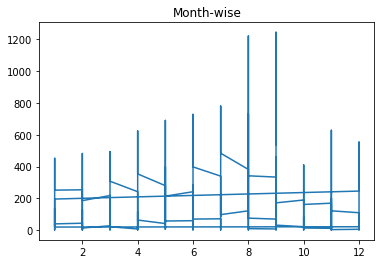

In [80]:
fig, ax = plt.subplots()

ax.plot(new_data['month'], new_data['count'])
ax.set_title('Month-wise')

In [81]:
new_data.dtypes

month        int64
year         int64
day          int64
hour         int64
minute       int64
year_end      bool
month_end     bool
count        int64
dtype: object

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [83]:
x = new_data.drop(['count'], axis = 1)
y = new_data['count']

model = LR()

## RMSE for test_size = 0.33

In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33, random_state = 42)


In [85]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
train_pred = model.predict(xtrain)

In [87]:
test_pred = model.predict(xtest)

In [88]:
print("RMSE on Training data", mean_squared_error(ytrain, train_pred)**(0.5))

RMSE on Training data 84.54377904305049


In [89]:
print("RMSE on Test data", mean_squared_error(ytest, test_pred)**(0.5))

RMSE on Test data 89.23076808572993


## RMSE for test_size = 0.5

In [90]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.5, random_state = 42)
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

In [92]:
print("RMSE on Training data", mean_squared_error(ytrain, train_pred)**(0.5))
print("RMSE on Test data", mean_squared_error(ytest, test_pred)**(0.5))

RMSE on Training data 85.58606807376749
RMSE on Test data 86.62490605568593
